# 1 - 准确率、精确率和召回率

## 1.1 混淆矩阵

在分类任务下，预测结果(Predicted Condition)与正确标记(True Condition)之间存在四种不同的组合，构成混淆矩阵(适用于多分类)：
   - TP：True Positives， 表示实际为正例且被分类器判定为正例的样本数
   - FP：False Positives， 表示实际为负例且被分类器判定为正例的样本数
   - FN：False Negatives， 表示实际为正例但被分类器判定为负例的样本数
   - TN：True Negatives， 表示实际为负例且被分类器判定为负例的样本数

<font color=#FF2121>小技巧：第一个字母表示划分正确与否；第二个字母表示分类器判定结果（P:判定为正例，N:判定为反例）</font>

|     | 预测正例  | 预测假例  |
|  :----:  |  :----:  | :----:  |
| 真实正例  | TP（真阳性） | FN（假阴性） |
| 真实假例  | FP（假阳性）  | TN（真阴性） |

## 1.2 准确率(Accuracy)、精确率(Precision) 与召回率(Recall)

准确率：对于给定的测试数据集，分类器正确分类的样本数与总样本数之比

$$
Accuracy = \frac{TP+TN}{TP+FP+TN+FN}
$$

精确率：预测结果为正例样本中真实为正例的比例

$$
Precision = \frac{TP}{TP+FP}
$$

    精确率高，意味着分类器要尽量在 “更有把握” 的情况下才将样本预测为正样本， 这意味着精确率能够很好的体现模型对于负样本的区分能力，精确率越高，则模型对负样本区分能力越强。
    
    简单来说就是，精确率需要降低FP,减少把假例判定成正例的情况，也就是分类器判定正例的条件更为严格。
    
召回率：真实为正例的样本中预测结果为正例的比例

$$
Precision = \frac{TP}{TP+FN}
$$

    召回率高，意味着分类器尽可能将有可能为正样本的样本预测为正样本，这意味着召回率能够很好的体现模型对于正样本的区分能力，召回率越高，则模型对正样本的区分能力越强

**精确率与召回率是此消彼长的关系， 如果分类器只把可能性大的样本预测为正样本，那么会漏掉很多可能性相对不大但依旧满足的正样本，从而导致召回率降低。**

## 1.3 F1 score

调和均值，是精确率和召回率评估指标,理想情况下做到两个指标都高当然最好，但一般情况下，精确率高，召回率就低，召回率高，精确率就低。

$$
F - Score = (1+\beta^{2}) * \frac{Precision * Recall}{(\beta^{2}*Precision)+Recall}
$$

所以在实际中常常需要根据具体情况做出取舍，例如一般的搜索情况，在保证召回率的条件下，尽量提升精确率。而像癌症检测、地震检测、金融欺诈等，则在保证精确率的条件下，尽量提升召回率。

 引出了一个新的指标F-score,综合考虑Precision和Recall的调和值。

   - 当β=1时，称为 F1-score或者 F1-Measure，这时，精确率和召回率都很重要，权重相同。
   - 当有些情况下，我们认为精确率更重要些，那就调整β的值小于1，
   - 如果我们认为召回率更重要些，那就调整β的值大于1。

常见的F1-Score计算公式如下：
$$
F Measure = \frac{2}{\frac{1}{precision}\frac{1}{recall}} = \frac{2TP}{2TP+FP+FN}
$$

# 2 - Roc曲线

ROC的全名叫做Receiver Operating Characteristic，中文名字叫“受试者工作特征曲线”，其主要分析工具是一个画在二维平面上的曲线——ROC 曲线。平面的横坐标是false positive rate(FPR)，纵坐标是true positive rate(TPR)。对某个分类器而言，我们可以根据其在测试样本上的表现得到一个TPR和FPR点对。这样，此分类器就可以映射成ROC平面上的一个点。调整这个分类器分类时候使用的阈值，我们就可以得到一个经过(0, 0)，(1, 1)的曲线，这就是此分类器的ROC曲线。

- 真阳性率，又叫做灵敏度（Sensitivity）、召回率（Recall）

$$
TPR = \frac{TP}{TP+FN}
$$

- 假阳性率，又叫做误诊率（=1-特异度）

$$
FPR = \frac{FN}{FP+TN}
$$

- 假阴性率，又叫漏诊率（=1-灵敏度）

$$
FNR = \frac{FN}{TP+FN}
$$

- 真阴性率，又叫特异度（Specificity）

$$
TNR = \frac{TN}{FP+TN}
$$

对于一个分类任务的测试集，其本身有正负两类标签，我们对于这个测试集有一个预测标签，也是正负值。分类器开始对样本进行分类时，首先会计算该样本属于正确类别的概率，进而对样本的类别进行预测。比如说给出一组图片，让分类器判断该图片是否为汉堡，分类器在开始分类前会首先计算该图片为汉堡的概率，进而对该图片的类别进行预测，是汉堡或者不是汉堡。我们用概率来表示横坐标，真实类别表示纵坐标，分类器在测试集上的效果就可以用散点图来表示，如图所示

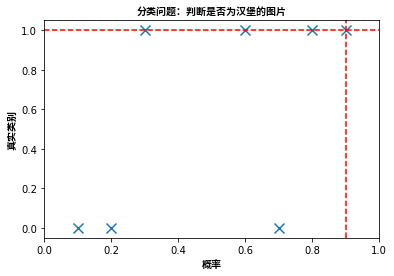

In [62]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

plt.xlim(0, 1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("分类问题：判断是否为汉堡的图片", fontproperties=zhfont1)
plt.xlabel("概率", fontproperties=zhfont1)
plt.ylabel("真实类别", fontproperties=zhfont1)
x = np.array([0.1, 0.2, 0.3, 0.6, 0.7, 0.8, 0.9])
y = np.array([0, 0, 1, 1, 0, 1, 1])
plt.scatter(x, y, marker='x', s=100)
plt.axhline(y=1, ls='--', c="red")
plt.axvline(x=0.9, ls='--', c="red")

那么如何通过概率来获得预测的类别呢？
通常我们会设置一个阈值，这里以0.5为例。

当概率≥0.5时，分类器认为这张图片是汉堡，也就是图中虚线右边的部分，我们用橙色来表示；

当概率<0.5时，分类器认为这张图片不是汉堡，也就是图中虚线左边的部分，我们用薄荷绿来表示；

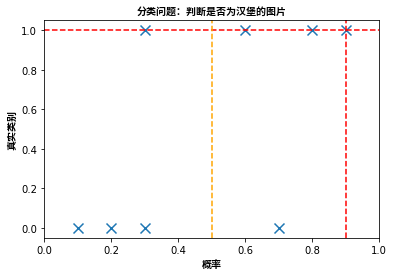

In [64]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

plt.xlim(0, 1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("分类问题：判断是否为汉堡的图片", fontproperties=zhfont1)
plt.xlabel("概率", fontproperties=zhfont1)
plt.ylabel("真实类别", fontproperties=zhfont1)
x = np.array([0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.8, 0.9])
y = np.array([0, 0, 0, 1, 1, 0, 1, 1])
plt.scatter(x, y, marker='x', s=100)
plt.axhline(y=1, ls='--', c="red")
plt.axvline(x=0.9, ls='--', c="red")
plt.axvline(x=0.5, ls='--', c="orange")

https://blog.csdn.net/m0_48520385/article/details/118636338?spm=1001.2101.3001.6650.7&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-7-118636338-blog-103246932.t5_layer_eslanding_sa_randoms&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-7-118636338-blog-103246932.t5_layer_eslanding_sa_randoms&utm_relevant_index=12